<a href="https://colab.research.google.com/github/MVRanjitha/Machine-learning/blob/main/CNN_model_to_classify_Traffic_Sign_Images_Using_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 
  - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
  - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
  - (4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
  - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
  - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
  - (10, b'No passing for vehicles over 3.5 metric tons')
  - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
  - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
  - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
  - (18, b'General caution') (19, b'Dangerous curve to the left')
  - (20, b'Dangerous curve to the right') (21, b'Double curve')
  - (22, b'Bumpy road') (23, b'Slippery road')
  - (24, b'Road narrows on the right') (25, b'Road work')
  - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
  - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
  - (31, b'Wild animals crossing')
  - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
  - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
  - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
  - (40, b'Roundabout mandatory') (41, b'End of no passing')
  - (42, b'End of no passing by vehicles over 3.5 metric tons')
-

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT LIBRARIES

In [3]:
%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==2.0.0.alpha0



Found existing installation: tensorflow 2.5.0
Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0
     |████████████████████████████████| 332.5 MB 40 kB/s 
     |████████████████████████████████| 3.0 MB 58.1 MB/s 
     |████████████████████████████████| 50 kB 9.3 MB/s 
     |████████████████████████████████| 411 kB 59.0 MB/s 


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

IMPORT DATASET

In [5]:
with open("/content/drive/My Drive/Colab Notebooks/Tensorflow/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/Colab Notebooks/Tensorflow/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Colab Notebooks/Tensorflow/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

VISUALIZE DATASET

1

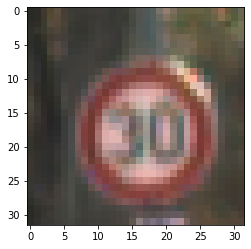

In [9]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

7

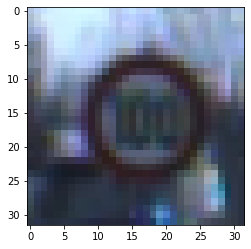

In [10]:
i = 3001
plt.imshow(X_validation[i])
y_validation[i]

29

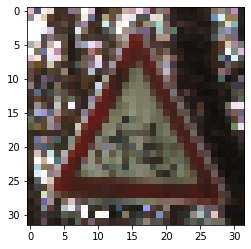

In [11]:
i = 2100
plt.imshow(X_test[i])
y_test[i]

DATA PREPARATION

In [12]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [13]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)


In [14]:
X_train_gray.shape


(34799, 32, 32, 1)

In [15]:
X_test_gray.shape


(12630, 32, 32, 1)

In [16]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [17]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [18]:
X_train_gray_norm

array([[[[-0.71614583],
         [-0.71354167],
         [-0.71354167],
         ...,
         [-0.68229167],
         [-0.67447917],
         [-0.67447917]],

        [[-0.66666667],
         [-0.66927083],
         [-0.66927083],
         ...,
         [-0.5859375 ],
         [-0.59375   ],
         [-0.57291667]],

        [[-0.58854167],
         [-0.6015625 ],
         [-0.6015625 ],
         ...,
         [-0.5234375 ],
         [-0.52083333],
         [-0.51822917]],

        ...,

        [[-0.59114583],
         [-0.59375   ],
         [-0.5703125 ],
         ...,
         [-0.69010417],
         [-0.66145833],
         [-0.6328125 ]],

        [[-0.54427083],
         [-0.52604167],
         [-0.5234375 ],
         ...,
         [-0.65885417],
         [-0.68229167],
         [-0.6328125 ]],

        [[-0.50520833],
         [-0.47395833],
         [-0.421875  ],
         ...,
         [-0.59114583],
         [-0.6171875 ],
         [-0.61979167]]],


       [[[ 0.10677083],


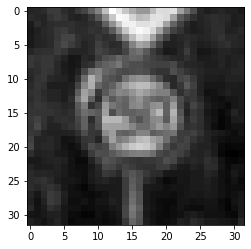

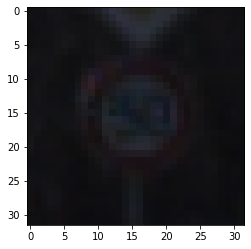

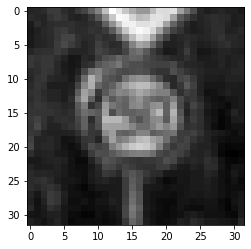

In [19]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

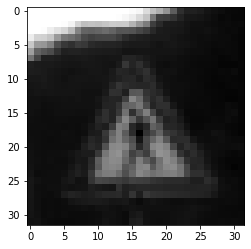

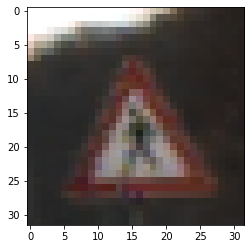

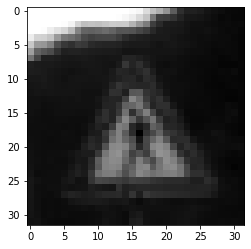

In [20]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

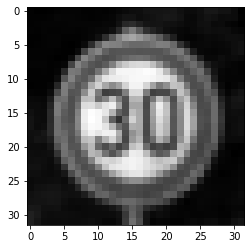

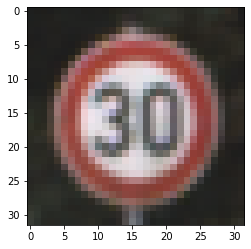

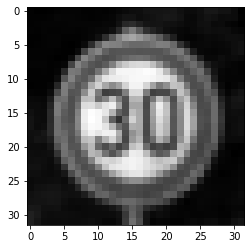

In [21]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

MODEL TRAINING

In [22]:
from tensorflow.keras import datasets, layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
LeNet.add(layers.AveragePooling2D())


LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation = 'relu'))

LeNet.add(layers.Dense(84, activation = 'relu'))

LeNet.add(layers.Dense(43, activation = 'softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [23]:
LeNet.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
history = LeNet.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 nb_epoch = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 8s 217us/sample - loss: 3.1859 - accuracy: 0.1775 - val_loss: 2.9224 - val_accuracy: 0.2635
Epoch 2/50
34799/34799 [==============================] - 1s 16us/sample - loss: 1.9231 - accuracy: 0.4727 - val_loss: 1.6634 - val_accuracy: 0.5324
Epoch 3/50
34799/34799 [==============================] - 1s 17us/sample - loss: 1.1015 - accuracy: 0.6888 - val_loss: 1.2034 - val_accuracy: 0.6435
Epoch 4/50
34799/34799 [==============================] - 1s 17us/sample - loss: 0.7959 - accuracy: 0.7742 - val_loss: 0.9294 - val_accuracy: 0.7286
Epoch 5/50
34799/34799 [==============================] - 1s 17us/sample - loss: 0.6239 - accuracy: 0.8310 - val_loss: 0.8653 - val_accuracy: 0.7413
Epoch 6/50
34799/34799 [==============================] - 1s 16us/sample - loss: 0.5248 - accuracy: 0.8559 - val_loss: 0.8110 - val_accuracy: 0.7653
Epoch 7/50
34799/34799 [==============================] 

MODEL EVALUATION

In [25]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 1s 60us/sample - loss: 1.1968 - accuracy: 0.8497
Test Accuracy: 0.8497228622436523


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']



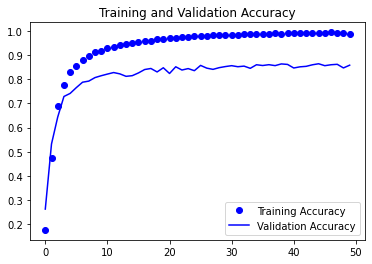

In [28]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

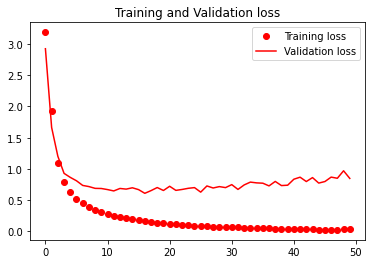

In [29]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [30]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

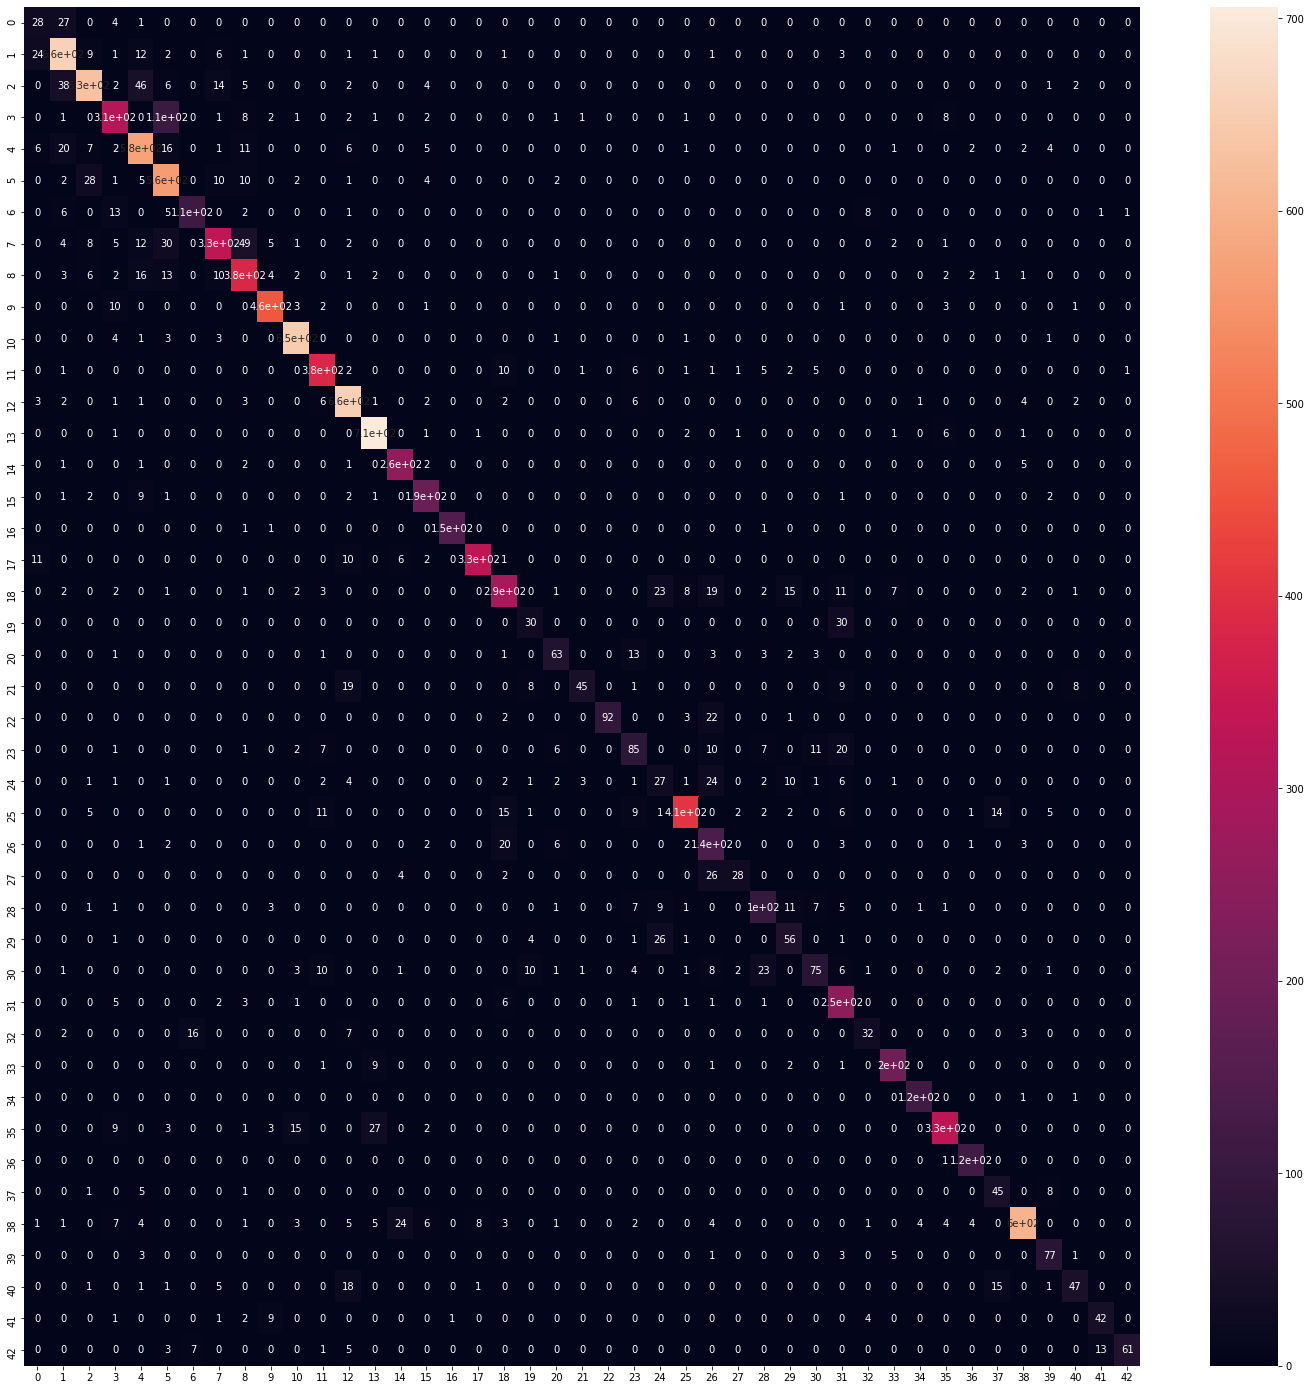

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)

plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

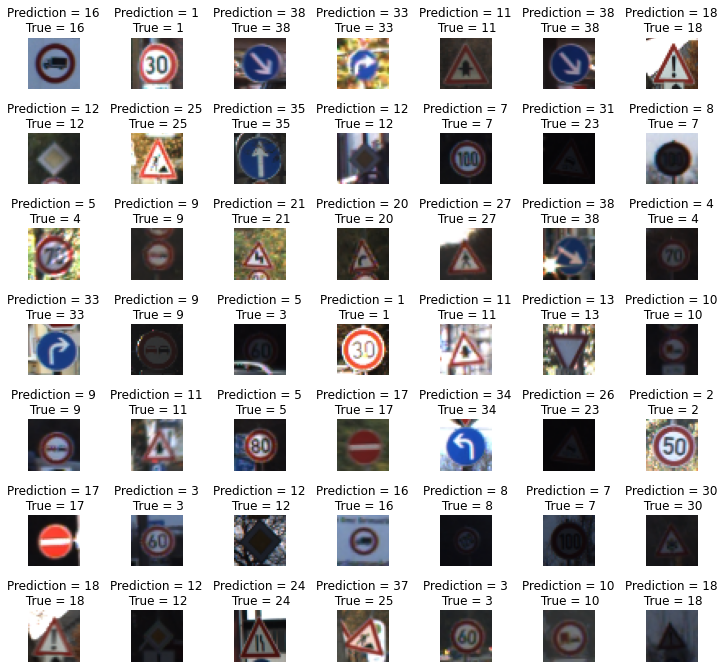

In [33]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    